In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import copy

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
# ignores FutureWarnings. Helps in readbility.
# Since we are using a conda envrionment with defined package versions we are not concerned with changes in a package's future releases.


In [3]:
sns.set(style="whitegrid", font_scale=1.3)

In [4]:
datadir = "data"
savedir = "plots"

if not os.path.exists(savedir):
    os.mkdir(savedir)

In [5]:
df_metadata = pd.read_table(os.path.join(datadir, "metadata_kidney.txt"), index_col=0)
df_metadata = df_metadata.dropna()

In [6]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [7]:
results_cats = ["Park", "Miao"]

In [8]:
methods = ["MuSiC", "CibersortX", "Scaden", "TAPE-O", "TAPE-A", "Linear MLPs", "DISSECT"]

df_dict = {}
for cat in results_cats:
    df_dict[cat] = {}
    results = [os.path.join(datadir, "{}_{}.csv".format(method.replace(" ", "_"), cat.lower())) for method in methods]
    results_dict = dict(zip(methods, results))
    
    for method in methods:
        df = pd.read_csv(results_dict[method], index_col=0)
        df_dict[cat][method] = df

In [9]:
palette = {"Ctrl": "lightblue", "APOL1": "blue"}

In [10]:
cts = df_dict["Miao"]["MuSiC"].columns
methods = list(df_dict["Miao"].keys())
datasets = list(df_dict.keys())
tick_spacing = .5


Park
Miao


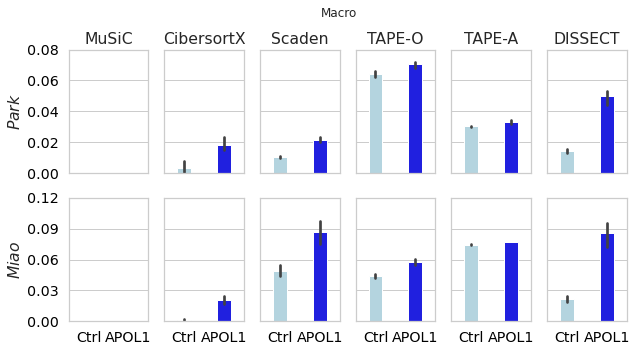

Park
Miao


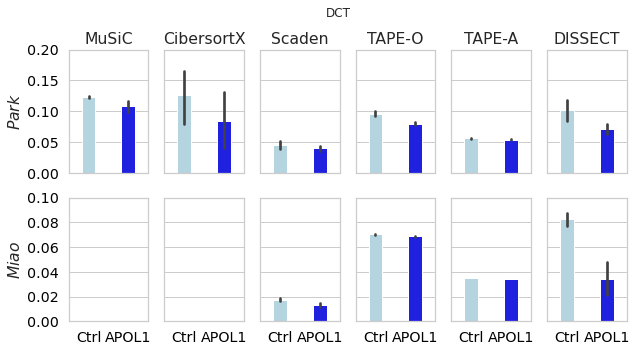

Park
Miao


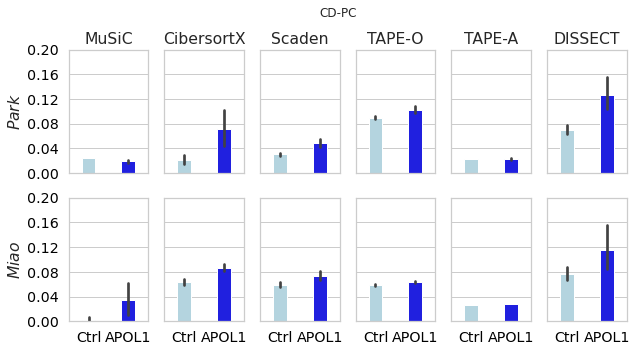

Park
Miao


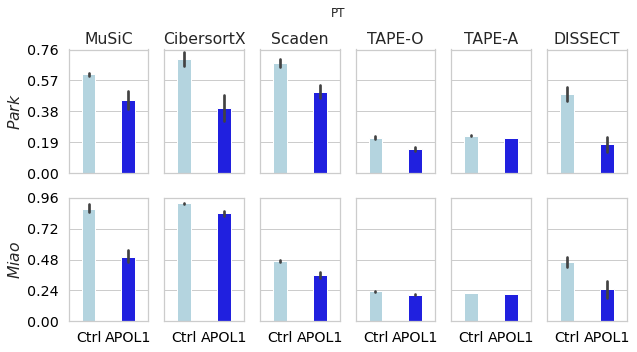

Park
Miao


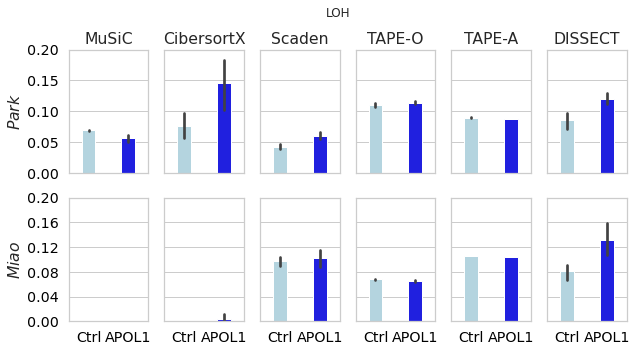

Park
Miao


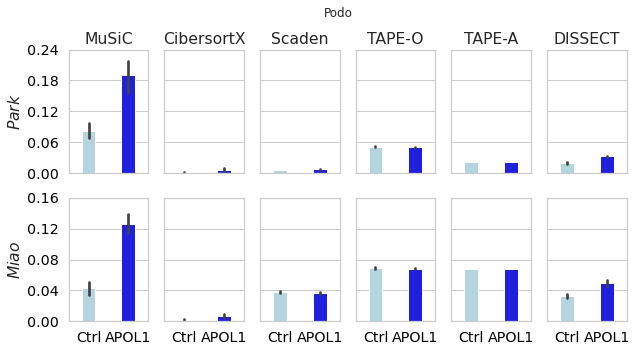

Park
Miao


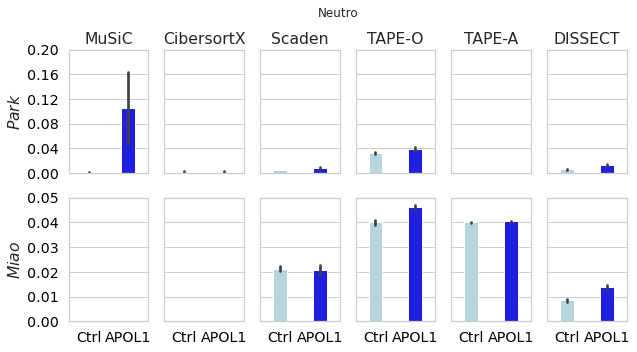

Park
Miao


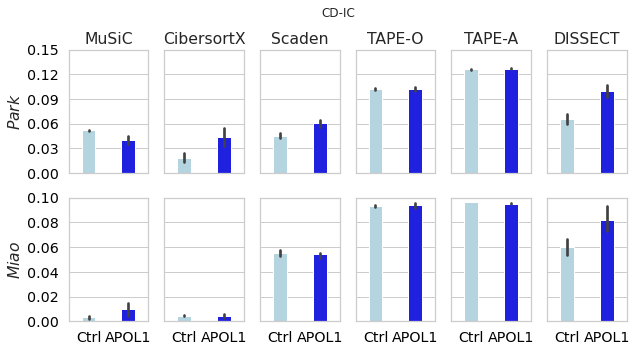

Park
Miao


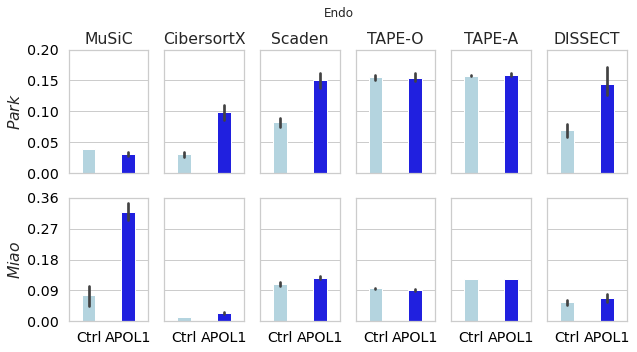

In [11]:
for ct in cts:
    plt.figure(figsize=(10,5))
    plt.suptitle(ct, ha="center", va="center")
    i=1
    methods1 = [method for method in list(df_dict["Park"].keys()) if method!="Linear MLPs"] #["TAPE-O", "DISSECT"]
    for dataset in datasets:
        print(dataset)
        max_values = []
        for method in methods1:
            max_values.append(df_dict[dataset][method][ct].max())
        max_ct = max(max_values)
        for method in methods1:
            ax=plt.subplot(2,len(methods1),i)
            # df_dict[dataset][method].index = df_metadata.index
            y = df_dict[dataset][method].loc[df_metadata.index.tolist(), ct]

            x = df_metadata["Condition"]
            tmp = pd.DataFrame(columns=[ct, "Condition"], index=x.index)
            tmp[ct] = y.tolist()
            tmp["Condition"] = x.tolist()

            tmp["Condition"].replace({"Kidney_G2-APOL1_risk allele": "APOL1",
                             "WT": "Ctrl"}, inplace=True)
            tmp["x"] = tmp["Condition"].tolist()
            tmp["x"].replace({"Ctrl": 0, "APOL1": 1}, inplace=True)


            sns.barplot(data=tmp, x="Condition", y=ct, palette=palette, order=["Ctrl", "APOL1"],
                       ax=ax)
            ax.tick_params(axis='x', colors='black')
            ax.tick_params(axis='y', colors='black')
            
            change_width(ax, .35)
            if i not in [1,len(methods1)+1]:
                plt.ylabel("") 
                ax.set_yticklabels([])
            else:
                plt.ylabel(r"${}$".format(dataset))
            plt.ylim(0, max_ct)
            range_ = np.arange(0, max_ct+round(max_ct/4,2), round(max_ct/4,2))
            plt.yticks(range_)
            
           
            
            if i<len(methods1)+1:
                plt.xticks([])
                plt.title(method)
            plt.xlabel("")
            i+=1

    plt.savefig(os.path.join(savedir, "kidney_{}.png".format(ct)), bbox_inches="tight", dpi=300)
    plt.savefig(os.path.join(savedir, "kidney_{}.pdf".format(ct)), bbox_inches="tight")
    plt.show()